In [1]:
# import the necessary libraries:import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import csv file :
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



# Dataset Information :
The dataset contains various columns that provide information below:

**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present)

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [4]:
#check the null value in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Check duplicate
df.duplicated().sum()

1

In [7]:
#Drop duplicate
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()#descriptive statistics of dataset.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.shape

(302, 14)

In [15]:
col=df.columns
col


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

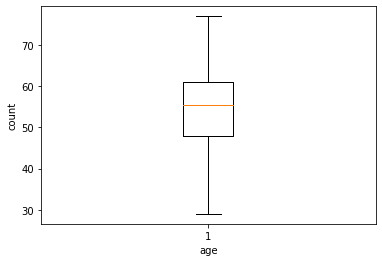

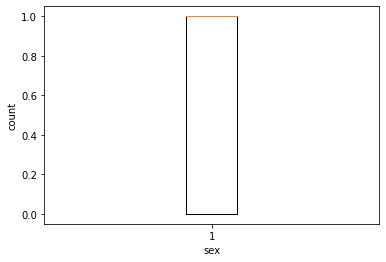

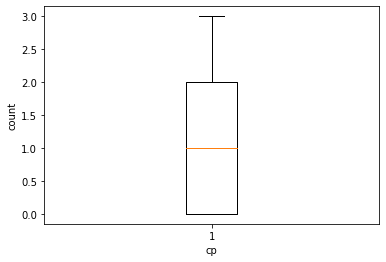

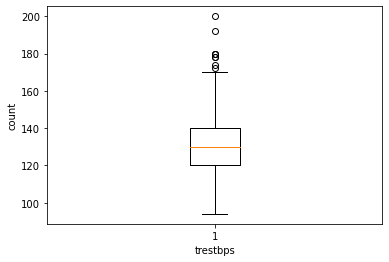

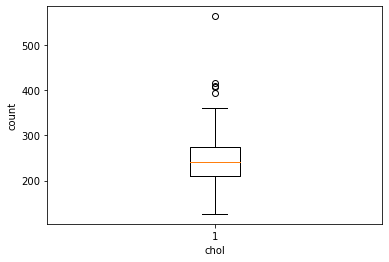

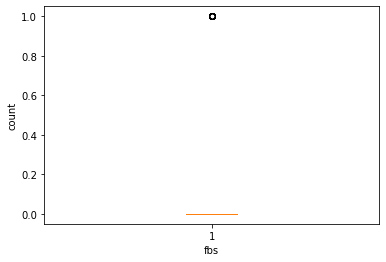

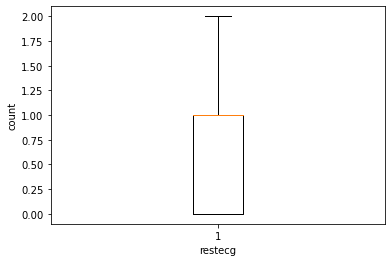

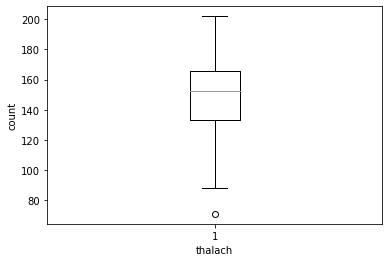

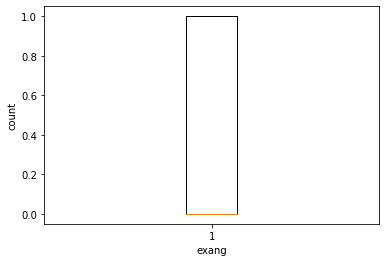

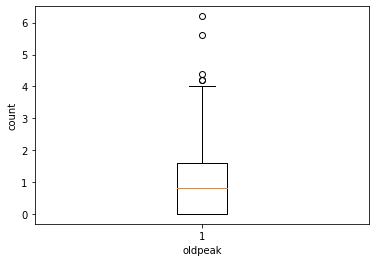

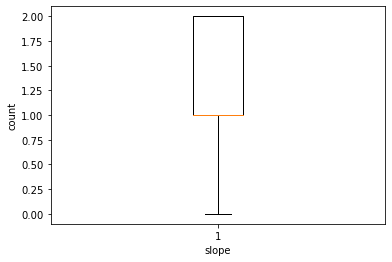

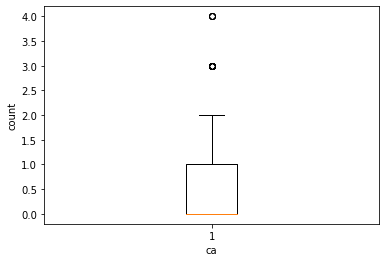

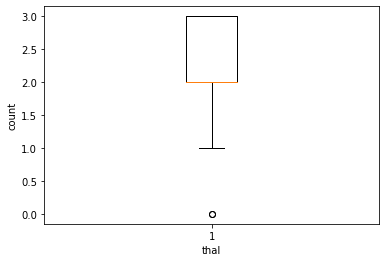

In [16]:
#plotting the box plot for outliers removal:
for col_name in col:
    if ((df[col_name].dtypes != 'object') & (col_name != "target")):
        
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [18]:
outliers=['trestbps','chol','thalach','oldpeak']

In [19]:
outliers

['trestbps', 'chol', 'thalach', 'oldpeak']

In [20]:
#outliers removal:
for i in outliers:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    df = df[(df[i]<=upper) & (df[i]>= lower)]

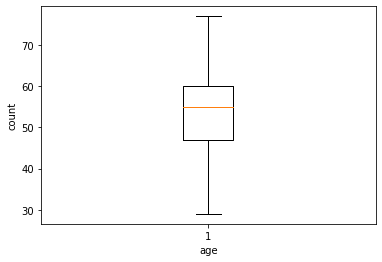

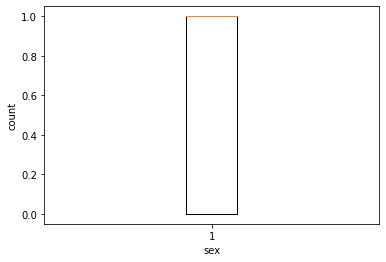

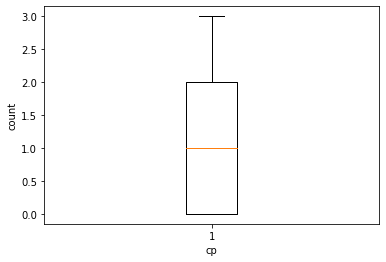

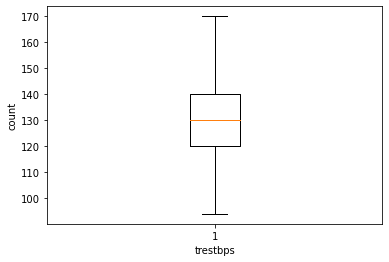

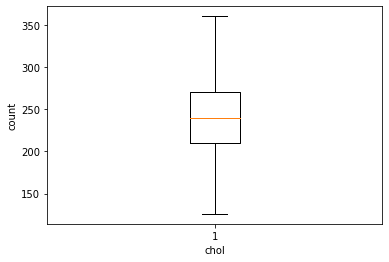

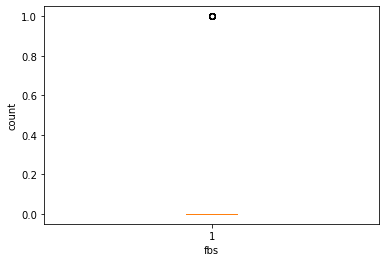

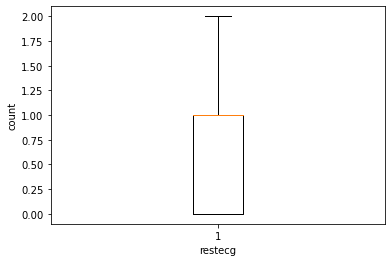

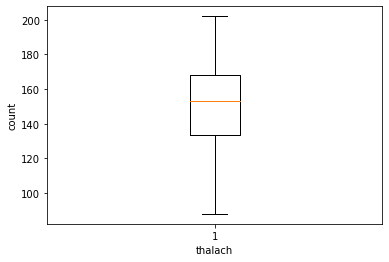

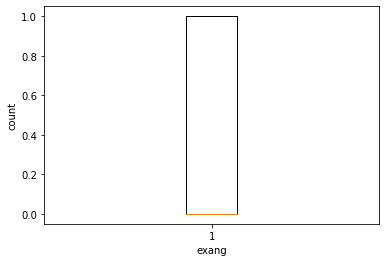

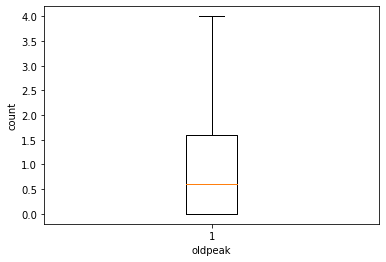

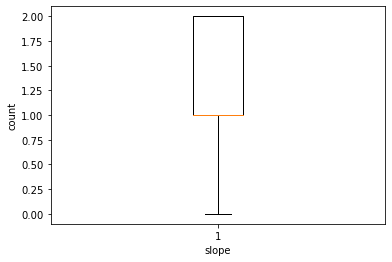

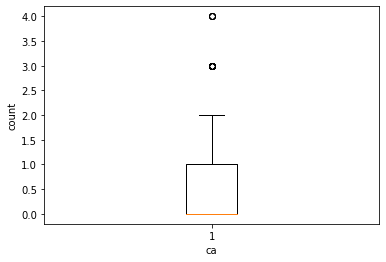

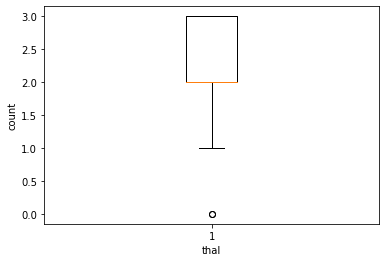

In [21]:
#plotting the box plot again to check outliers is removed or not 
for col_name in col:
    if ((df[col_name].dtypes != 'object') & (col_name != "target")):
        
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [22]:
df.shape # earlier 302 - after outlier removal 283  =19 records removed 

(283, 14)

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
#MODEL BULIDING 
# spliting the data into dependent (y)and independent(x)
x = df.iloc[:,:-1]
y = df["target"]

In [28]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [31]:
# spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=999)

In [32]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3


In [33]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier() 

In [39]:
dt.fit(x_train, y_train) #training

DecisionTreeClassifier()

In [40]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [42]:
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
accuracy_score(y_pred, y_test)# model accuracy is 74%.

0.7411764705882353

In [45]:
confusion_matrix(y_pred, y_test)
# confusion matrix  showing the number of instances that are correctly classified and wrongly classified.

array([[23, 11],
       [11, 40]], dtype=int64)

In [47]:
x_test.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2


In [48]:

dt.predict([[55,1, 4, 250, 88, 1, 899, 0, 0, 10, 8, 89, 8 ]])

#According to above new enter details.
#patient is not suffering form heart diease (0 = no heart disease, 1 = heart disease present))

array([0], dtype=int64)